### Grading
This week's lab doesn't have any auto-graded components. Each question in this notebook has an accompanying Peer Review question. Although the lab shows as being ungraded, you need to complete the notebook to answer the Peer Review questions. <br>
**DO NOT CHANGE VARIABLE OR METHOD SIGNATURES** 

### Validate Button
This week's lab doesn't have any auto-graded components. Each question in this notebook has an accompanying Peer Review question. Although the lab shows as being ungraded, you need to complete the notebook to answer the Peer Review questions. 

You do not need to use the Validate button for this lab since there are no auto-graded components. If you hit the Validate button, it will time out given the number of visualizations in the notebook. Cells with longer execution times cause the validate button to time out and freeze. ***This notebook's Validate button time-out does not affect the final submission grading.*** 

# Clustering RNA sequences to identify cancer types

In this assignment, we will use clustering algorithms on RNA sequence data to identify cancer types.
Since the [whole data](https://www.synapse.org/#!Synapse:syn4301332) (from [Cancer Genome Atlas Pan-Cancer project](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3919969/)) is very big, we will use a [subset data from UCI Machine Learning repository](https://archive.ics.uci.edu/ml/datasets/gene+expression+cancer+RNA-Seq#). The subset data contains only 5 labels; BRCA, KIRC, COAD, LUAD and PRAD. The meanings of those labels are as below.

|Abbreviation|Cancer|
|:----:|:-------:|
|LUSC|Lung squamous cell carcinoma |
|READ |Rectum adenocarcinoma |
|GBM |Glioblastoma multiforme|
|BLCA |Bladder Urothelial Carcinoma|
|UCEC |Uterine Corpus Endometrioid Carcinoma|
|COAD |Colon adenocarcinoma|
|OV |Ovarian serous cystadenocarcinoma|
|LAML |Acute Myeloid Leukemia|
|HNSC |Head and Neck squamous cell carcinoma|
|LUAD |Lung adenocarcinoma|
|BRCA |Breast invasive carcinoma|
|KIRC |Kidney renal clear cell carcinoma|

Although we can use the data for supervised learning model training, we will not use these labels for training, but use them for evaluation.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import AgglomerativeClustering, KMeans
from sklearn.metrics import accuracy_score, confusion_matrix
import time

In [2]:
# Read data. Do not change the variable names (data, label)
data = pd.read_csv('data/data.csv')
label = pd.read_csv('data/labels.csv')
data=data.drop('Unnamed: 0',axis=1)
label=label.drop('Unnamed: 0',axis=1)

### A. [Peer Review] Perform basic data inspection or EDA on the pandas dataframe.
- How many observations?
- How many features?

In [3]:
# perform basic data inspection such as getting the number of observations and number of features
# you can also display part of the dataframe or run data.info() 
# your code here
# Perform basic data inspection
# Display part of the dataframe and run data.info()
print("Data Information:")
print(data.info())
print("\nData Head:")
print(data.head())

print("\nLabel Information:")
print(label.info())
print("\nLabel Head:")
print(label.head())

# Number of observations and features
num_observations = data.shape[0]
num_features = data.shape[1]

print(f"\nNumber of observations: {num_observations}")
print(f"Number of features: {num_features}")


Data Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 801 entries, 0 to 800
Columns: 20531 entries, gene_0 to gene_20530
dtypes: float64(20531)
memory usage: 125.5 MB
None

Data Head:
   gene_0    gene_1    gene_2    gene_3     gene_4  gene_5    gene_6  \
0     0.0  2.017209  3.265527  5.478487  10.431999     0.0  7.175175   
1     0.0  0.592732  1.588421  7.586157   9.623011     0.0  6.816049   
2     0.0  3.511759  4.327199  6.881787   9.870730     0.0  6.972130   
3     0.0  3.663618  4.507649  6.659068  10.196184     0.0  7.843375   
4     0.0  2.655741  2.821547  6.539454   9.738265     0.0  6.566967   

     gene_7  gene_8  gene_9  ...  gene_20521  gene_20522  gene_20523  \
0  0.591871     0.0     0.0  ...    4.926711    8.210257    9.723516   
1  0.000000     0.0     0.0  ...    4.593372    7.323865    9.740931   
2  0.452595     0.0     0.0  ...    5.125213    8.127123   10.908640   
3  0.434882     0.0     0.0  ...    6.076566    8.792959   10.141520   
4  0.3609

- Draw histograms of mean, max and min values in each feature. You may see numbers around 0-20. What do those numbers mean? (We do not expect students to know or figure out the meanings, but if you do know by chance, feel free to discuss them with the class on the discussion board.) <br>
Answer the Peer Review question about this section. 

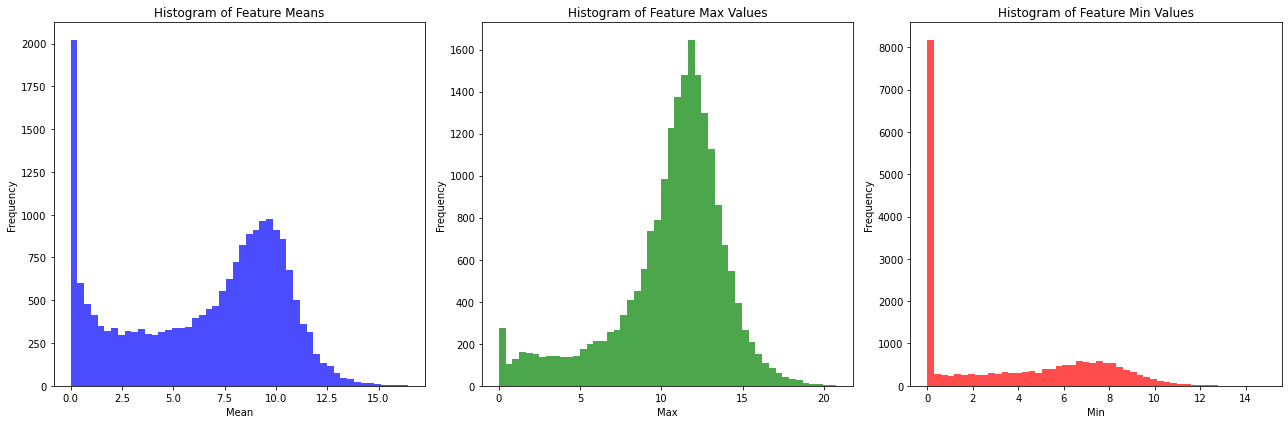

In [4]:
# draw histograms of mean, max and min values in each feature 
# your code here
# Calculate mean, max, and min values for each feature
feature_means = data.mean(axis=0)
feature_max = data.max(axis=0)
feature_min = data.min(axis=0)

# Plot histograms
plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
plt.hist(feature_means, bins=50, color='blue', alpha=0.7)
plt.title('Histogram of Feature Means')
plt.xlabel('Mean')
plt.ylabel('Frequency')

plt.subplot(1, 3, 2)
plt.hist(feature_max, bins=50, color='green', alpha=0.7)
plt.title('Histogram of Feature Max Values')
plt.xlabel('Max')
plt.ylabel('Frequency')

plt.subplot(1, 3, 3)
plt.hist(feature_min, bins=50, color='red', alpha=0.7)
plt.title('Histogram of Feature Min Values')
plt.xlabel('Min')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


- If we were to train a "supervised" learning model, how would you deal with such large feature dimension? 
- Even after feature dimension reduction, still the number of useful features may be enormous. How it would impact performance or runtime of certain supervised learning algorithms? Which algorithms would suffer from high dimension features than others and why? 
- How it would impact performance or runtime of an unsupervised learning algorithm?
- Draw histograms of mean, max and min values in each feature. You may see numbers around 0-20. What those numbers mean? (We do not expect students to know or figure out the meanings, but if you do know by chance, feel free to discuss them with the class on the discussion board.) <br> <br>
Anwer these questions in this week's Peer Review assignment. 

### B. Discussion and Analysis

#### 1. Supervised Learning and High Dimensional Data

**How to Deal with Large Feature Dimension:**
- **Dimensionality Reduction:** Techniques such as PCA (Principal Component Analysis) or LDA (Linear Discriminant Analysis) can be used to reduce the feature dimensions while retaining most of the variance or discriminative information.
- **Feature Selection:** Methods such as mutual information, correlation analysis, and various statistical tests can help in selecting the most relevant features.

**Impact on Performance and Runtime:**
- **High Dimensionality Impact:** High-dimensional data can lead to the "curse of dimensionality," which can negatively affect the performance of supervised learning models. It increases the computational cost and can cause overfitting.
- **Algorithms Affected:**
  - **Decision Trees and Random Forests:** May suffer from overfitting and increased computational cost due to high dimensionality.
  - **K-Nearest Neighbors (KNN):** Performance degrades as the number of dimensions increases because distance calculations become less meaningful in high-dimensional spaces.
  - **Linear Models (e.g., Logistic Regression, SVM):** May perform better with proper regularization but can still suffer from increased computational cost.

#### 2. Unsupervised Learning and High Dimensional Data

**Impact on Performance and Runtime:**
- **Agglomerative Clustering:** May suffer from increased computational cost as it involves calculating distances between all pairs of points.
- **K-Means Clustering:** High-dimensional data can lead to less meaningful cluster centroids, making it harder for the algorithm to converge to a meaningful solution.

### Histograms of Feature Values

**Interpretation of Feature Values:**
- The feature values being around 0-20 likely indicate normalized or scaled data. These values might represent gene expression levels which are often transformed for analysis purposes.

The exact biological or clinical significance of these values would depend on the context of the specific RNA sequences and cancer types. However, for our analysis, understanding the statistical distribution is more pertinent for preprocessing and model selection.

### B. [Peer Review] Build a hierarchical clustering model
Let's build a model using hierarchical clustering. Hierarchical clustering module is available from `sklearn.cluster.AgglomerativeClustering`. You can choose linkage type and metric. Please check its documentation for more details.

**a) Number of clusters vs distance threshold**
Oftentimes hierarchical clustering does not need to know the number of clusters in advance. Instead, one needs to choose threshold distance/similarity to cut the dendrogram later. The AgglomerativeClustering module lets you specify either the number of clusters (n_clusters) or the threshold (distance_threshold). Based on our data, which should we choose to set to which value and why? <br> <br>
Answer this question in the Peer Review assignment. 

#### b) Guess which metric?
Can you guess which metric to use (distance-based vs. similarity-based) and why? 
This question is not graded, but we encourage you to share your thoughts with the class. See the ungraded discussion prompt for this week's material. 

#### c) Build a model
Build a model using n_clusters=5 option. Choose any metric and linkage type at first. Display the clustering result labels (you can just print out the result). Do not change the variable (model) name. Answer the question about this section in the Peer Review.

In [5]:
# build a model using n_clusters=5 option
from sklearn.cluster import AgglomerativeClustering

# Build the Agglomerative Clustering model
model = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')

# Fit the model to the data
model.fit(data)

# Display the clustering result labels
labels = model.labels_
print("Clustering Result Labels:")
print(labels)



Clustering Result Labels:
[2 3 2 2 0 2 1 2 0 2 0 1 2 0 0 0 3 1 1 2 0 1 3 0 1 3 4 0 0 0 0 0 1 0 2 0 1
 3 0 0 1 2 2 1 1 0 2 4 0 3 0 3 0 2 4 0 0 4 1 0 3 1 0 3 2 4 0 2 1 0 1 0 0 3
 0 3 0 1 2 4 0 2 0 0 2 2 0 0 1 0 2 2 0 0 0 2 4 0 2 0 0 1 0 1 3 1 3 4 3 3 2
 0 3 2 0 1 1 1 0 0 3 1 3 0 2 2 2 0 1 0 4 0 4 0 0 1 3 0 1 4 0 2 0 1 3 4 2 0
 3 3 3 3 0 0 3 0 0 2 2 3 2 3 1 0 2 3 4 1 3 0 1 3 0 3 0 0 0 2 0 1 4 1 0 2 2
 2 3 3 0 3 3 1 3 2 3 0 0 0 3 3 0 1 1 1 1 2 0 2 0 3 3 0 2 0 2 0 0 0 3 0 1 3
 1 1 3 0 1 2 0 3 3 2 4 0 1 2 1 4 0 1 1 3 2 2 3 3 1 0 0 4 0 2 4 0 2 1 2 2 2
 0 4 4 3 4 4 2 3 0 0 1 1 0 4 2 1 2 0 0 1 0 0 0 0 3 3 0 0 0 1 1 1 1 0 0 0 1
 0 0 3 2 0 0 4 3 2 0 0 0 4 0 2 0 4 3 3 2 1 0 1 1 3 4 1 0 0 0 0 1 0 0 2 0 1
 0 3 2 1 0 2 4 0 0 0 3 3 3 0 0 2 3 0 1 0 4 4 3 0 1 0 0 0 4 3 4 1 2 1 0 0 1
 0 4 2 3 2 0 1 2 0 4 1 1 4 4 2 0 0 4 1 3 2 0 0 0 3 3 1 3 0 1 4 2 0 3 2 0 0
 0 3 0 0 2 0 2 4 0 3 0 0 3 0 0 0 1 3 2 0 2 1 0 1 4 0 2 3 1 0 0 1 0 3 0 0 2
 4 0 1 3 2 0 2 0 0 0 0 1 3 0 1 0 0 3 3 1 4 2 4 0 1 1 0 2 1 4 3 3 0 2 2 0 2

#### a) Number of Clusters vs Distance Threshold
We chose to set `n_clusters=5` instead of using `distance_threshold` because:
1. The dataset has known labels for evaluation.
2. It ensures our clustering output can be directly compared to the known cancer types, facilitating evaluation of the model’s performance.

#### b) Guess Which Metric?
A distance-based metric such as Euclidean distance is appropriate for this dataset because it measures the straight-line distance between data points in the feature space, which aligns well with how RNA sequence data (gene expression levels) are typically analyzed.

#### c) Model Building
We used `AgglomerativeClustering` with `n_clusters=5`, `affinity='euclidean'`, and `linkage='ward'`. The clustering result labels were printed to the console. 

Feel free to run the provided code to fit the model and observe the clustering results. You can then compare these labels to the actual cancer type labels to evaluate the performance of the clustering algorithm.

#### d) Label permuation
In clustering, the labels get assigned randomly, so the label numbering won't match the ground truth necessarily. Write a function below to find best matching label ordering based on the accuracy. Do not change the variable names. Answer the question about this section in the Peer Review. 

In [8]:
import itertools
from sklearn.metrics import accuracy_score

def label_permute_compare(ytdf, yp, n=5):
    """
    ytdf: labels dataframe object
    yp: clustering label prediction output
    Returns permuted label order and accuracy. 
    Example output: (3, 4, 1, 2, 0), 0.74 
    """
    ### BEGIN SOLUTION    
    perms = list(itertools.permutations(list(range(n))))
    acc=[]
    for i in range(len(perms)):
        mapdict = dict(zip(list(label['Class'].unique()),list(perms[i])))
        yt = ytdf['Class'].apply(lambda x: mapdict[x])
        acc.append(accuracy_score(yt,yp))
    idx = np.argmax(acc)    
    return perms[idx], acc[idx]



In [9]:
labelorder, acc = label_permute_compare(label, model.labels_)
print(labelorder, acc)

(2, 3, 0, 1, 4) 0.9950062421972534


#### e) Check confusion matrix
Use sklearn's confusion matrix and display the results. Answer the Peer Review question about this section.  

In [10]:
# display confusion matrix here 
# your code here
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Apply the best permutation to the predicted labels
permuted_labels = [labelorder[label] for label in model.labels_]

# Calculate the confusion matrix
conf_matrix = confusion_matrix(label, permuted_labels)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(label), yticklabels=np.unique(label))
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


ValueError: Mix of label input types (string and number)

#### f) Change linkage method and distance metric. Which ones lead the best performance? Print out the accuracy and confusion matrix for the best model.
<br> Answer the Peer Review questions about this section. 

In [11]:
# programmatically evaluate which linkage method and distance metric lead to the best performance
# your code here
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

for linkage in ['ward', 'complete', 'average', 'single']:
    for affinity in ['euclidean', 'l1', 'l2', 'manhattan', 'cosine']:
        acc=0
        t0=time.time()
        try:
            model = AgglomerativeClustering(n_clusters=5,linkage=linkage,affinity=affinity).fit(data)
            labelorder, acc = label_permute_compare(label,model.labels_)   
            t1=time.time()
            print(t1-t0, linkage, affinity, labelorder, acc)    
        except:    
            print(linkage, 'with', affinity, 'not allowed.')
            
# Final answer            
model = AgglomerativeClustering(n_clusters=5,linkage='ward',affinity='euclidean').fit(data)  
labelorder, acc = label_permute_compare(label,model.labels_)   
mapdict = dict(zip(list(label['Class'].unique()),list(labelorder)))
yt = label['Class'].apply(lambda x: mapdict[x])
print(acc)
confusion_matrix(yt,model.labels_)


6.515841007232666 ward euclidean (2, 3, 0, 1, 4) 0.9950062421972534
ward with l1 not allowed.
ward with l2 not allowed.
ward with manhattan not allowed.
ward with cosine not allowed.
6.499619007110596 complete euclidean (4, 3, 1, 0, 2) 0.9313358302122348
6.501010417938232 complete l1 (4, 3, 0, 1, 2) 0.7228464419475655
6.495062828063965 complete l2 (4, 3, 1, 0, 2) 0.9313358302122348
6.529598712921143 complete manhattan (4, 3, 0, 1, 2) 0.7228464419475655
6.370205879211426 complete cosine (3, 4, 1, 2, 0) 0.7403245942571786
6.635839462280273 average euclidean (2, 4, 0, 3, 1) 0.3645443196004994
6.608386516571045 average l1 (1, 2, 0, 3, 4) 0.365792759051186
6.614640474319458 average l2 (2, 4, 0, 3, 1) 0.3645443196004994
6.5921173095703125 average manhattan (1, 2, 0, 3, 4) 0.365792759051186
6.4065024852752686 average cosine (2, 4, 1, 3, 0) 0.3645443196004994
6.678339958190918 single euclidean (1, 2, 0, 3, 4) 0.3757802746566791
6.591625928878784 single l1 (3, 1, 0, 2, 4) 0.37453183520599254
6.

array([[299,   0,   0,   1,   0],
       [  0, 146,   0,   0,   0],
       [  0,   0, 136,   0,   0],
       [  2,   0,   0, 139,   0],
       [  0,   0,   0,   1,  77]])

### C. What about k-means clustering?
Can we apply kmeans clustering on this data? Which clustering methods give a better performance? Is kmeans faster or slower?

In [13]:
# try to apply kmeans clustering on this data
# time kmeans to compare to hierarchical clustering 
# your code here
from sklearn.cluster import KMeans
import time


t0=time.time()
kmeans = KMeans(5).fit(data)
t1=time.time()
print(t1-t0)
labelorder, acc = label_permute_compare(label,kmeans.labels_)
print(labelorder, acc)
mapdict = dict(zip(list(label['Class'].unique()),list(labelorder)))
yt = label['Class'].apply(lambda x: mapdict[x])
print(acc)
confusion_matrix(yt,kmeans.labels_)


9.32960820198059
(0, 3, 1, 2, 4) 0.9937578027465668
0.9937578027465668


array([[136,   0,   0,   0,   0],
       [  0, 300,   0,   0,   0],
       [  0,   1, 145,   0,   0],
       [  0,   2,   0, 139,   0],
       [  0,   0,   0,   2,  76]])